In [1]:
!pip install pandas
!pip install seaborn
!pip install nltk
!pip install wordcloud
!pip install scikit-learn

In [2]:
# import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import string
import nltk
import joblib
# Download the WordNet resource
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pathu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pathu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pathu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pathu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data Preprocessing

In [3]:
# read data
trainingDataset = pd.read_csv('../dataset/twitter_training.csv')
validationDataset = pd.read_csv('../dataset/twitter_validation.csv')
# concatenate data
df = pd.concat([trainingDataset, validationDataset], ignore_index=False)
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                              --------------  -----  
 0   2401                                                                                                                                                                                                                                                74681 non-null  float64
 1   Borderlands                                                                

In [5]:
# Remove unnecessary columns
columns_to_drop = ['2401', '3364', 'Facebook', 'Irrelevant',
                   'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣']
df = df.drop(columns_to_drop, axis=1)

# Rename columns
df = df.rename(columns={'im getting on borderlands and i will murder you all ,': 'Tweet', 'Positive': 'Sentiment', 'Borderlands':"Branch"})
df.head()

,Branch,Sentiment,Tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
# check missing values
print(df.isnull().sum())

Branch        999
Sentiment     999
Tweet        1685
dtype: int64


In [7]:
# remove missing values
df.dropna(inplace=True)
# check missing values
df.isnull().sum()   

Branch       0
Sentiment    0
Tweet        0
dtype: int64

In [8]:
# check duplicate values
df.duplicated().sum()

3038

In [9]:
# remove duplicate values 
remove_duplicates = df.drop_duplicates()
df = remove_duplicates
# check duplicate values
df.duplicated().sum()

0

# drop

In [10]:
df = df.drop(df[df['Sentiment'] == 'Irrelevant'].index)

In [11]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

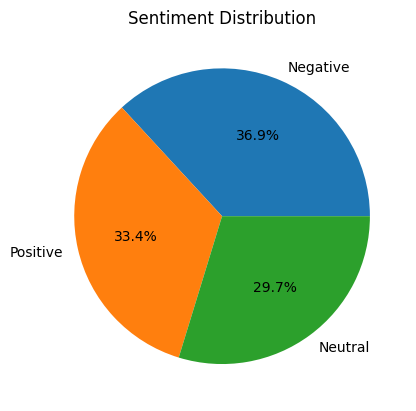

In [12]:
# count the number of rows for each unique value in the 'sentiment' column
counts = df['Sentiment'].value_counts()

# create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

# add a title
plt.title('Sentiment Distribution')

# show the chart
plt.show()

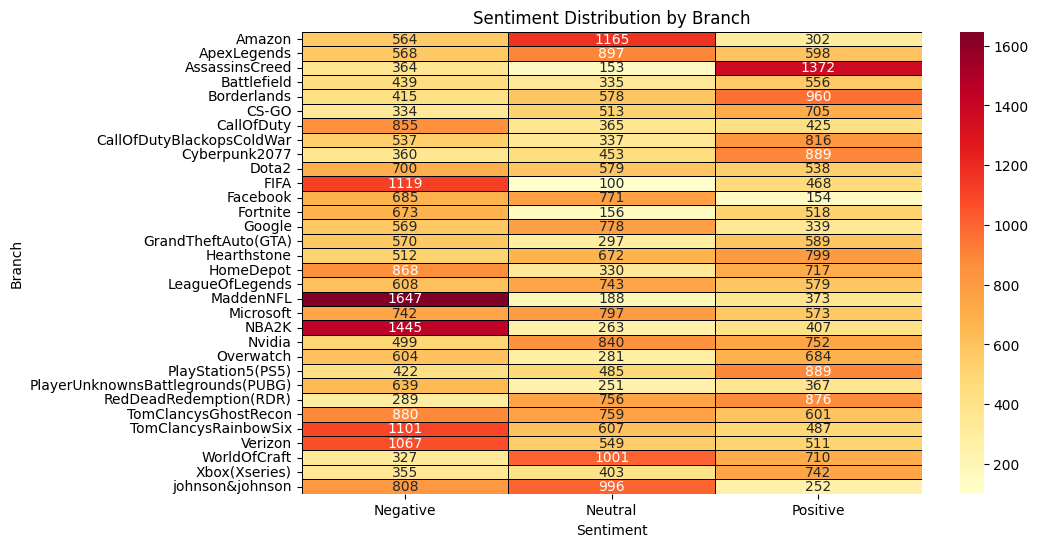

In [13]:
# Create cross-tabulation table in plot
plt.figure(figsize=(10, 6))
count_table = pd.crosstab(index=df['Branch'], columns=df['Sentiment'])
sns.heatmap(count_table, cmap='YlOrRd', annot=True, fmt='d',linewidths=0.5, linecolor='black')
plt.title('Sentiment Distribution by Branch')
plt.xlabel('Sentiment')
plt.ylabel('Branch')
plt.show()

In [14]:
# Display minimum and maximum values for each sentiment for each branch
for sentiment in count_table.columns:
    min_branch = count_table[sentiment].idxmin()
    max_branch = count_table[sentiment].idxmax()
    min_val = count_table[sentiment].min()
    max_val = count_table[sentiment].max()
    print(f"Sentiment '{sentiment}':")
    print(f"  Minimum value '{min_val}' at Branch '{min_branch}'")
    print(f"  Maximum value '{max_val}' at Branch '{max_branch}'\n")

Sentiment 'Negative':
  Minimum value '289' at Branch 'RedDeadRedemption(RDR)'
  Maximum value '1647' at Branch 'MaddenNFL'

Sentiment 'Neutral':
  Minimum value '100' at Branch 'FIFA'
  Maximum value '1165' at Branch 'Amazon'

Sentiment 'Positive':
  Minimum value '154' at Branch 'Facebook'
  Maximum value '1372' at Branch 'AssassinsCreed'



In [15]:
# Convert branches to a single string
branches_text = ' '.join(count_table.index)

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(branches_text)


In [16]:
# Concatenate all tweets into a single string
all_tweets_text = ' '.join(df['Tweet'])

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)

In [17]:
# Filter out rows with non-string values in the specified column.
#Convert non-string values to strings.

def filter_non_string(df, column):
    df = df.dropna(subset=[column])
    df[column] = df[column].astype(str)
    return df

In [18]:
#Convert text to lowercase to ensure consistency across the corpus.

def normalize_text(text):
    return text.lower()

In [19]:
#Remove HTML tags from the text.

def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

In [20]:
#Remove URLs or hyperlinks from the text.

def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

In [21]:
#Exclude numerical digits from the text."""

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [22]:
#Remove punctuation marks from the text.

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [23]:
#Split the text into individual words or tokens."""

def tokenize_text(text):
    return word_tokenize(text)

In [24]:
#Eliminate common stopwords from the tokenized text."""

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

In [25]:
import re

def remove_emojis(text):
    """Remove emojis from the text."""
    if isinstance(text, str):
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002500-\U00002BEF"  # chinese char
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"  # dingbats
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text

In [26]:
def vectorize_data(text_data):
    # Join the tokenized text into strings
    text_data_strings = [" ".join(tokens) for tokens in text_data]
    # Initialize TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()
    # Fit and transform the text data to generate TF-IDF vectors
    tfidf_vectors = tfidf_vectorizer.fit_transform(text_data_strings)
    return tfidf_vectors, tfidf_vectorizer

In [27]:
def preprocess_text(df):
    df = filter_non_string(df, 'Tweet')
    df['Tweet'] = df['Tweet'].apply(normalize_text)
    df['Tweet'] = df['Tweet'].apply(remove_html_tags)
    df['Tweet'] = df['Tweet'].apply(remove_urls)
    df['Tweet'] = df['Tweet'].apply(remove_numbers)
    df['Tweet'] = df['Tweet'].apply(remove_punctuation)
    df['Tweet'] = df['Tweet'].apply(tokenize_text)
    df['Tweet'] = df['Tweet'].apply(remove_stopwords)
    df['Tweet'] = df['Tweet'].apply(remove_emojis)
    return df

# Usage:
df_processed = preprocess_text(df)

In [28]:
df_processed

,Branch,Sentiment,Tweet
0,Borderlands,Positive,"[coming, borders, kill]"
1,Borderlands,Positive,"[im, getting, borderlands, kill]"
2,Borderlands,Positive,"[im, coming, borderlands, murder]"
3,Borderlands,Positive,"[im, getting, borderlands, murder]"
4,Borderlands,Positive,"[im, getting, borderlands, murder]"
...,...,...,...
74676,Nvidia,Positive,"[realized, windows, partition, mac, like, year..."
74677,Nvidia,Positive,"[realized, mac, window, partition, years, behi..."
74678,Nvidia,Positive,"[realized, windows, partition, mac, years, beh..."
74679,Nvidia,Positive,"[realized, windows, partition, mac, like, year..."


In [29]:
# df_processed contains preprocessed text data
# Convert list of words into a single string for each entry in 'Tweet' column
df_processed['Tweet'] = df_processed['Tweet'].apply(lambda x: ' '.join(x))

# Split data into features (X) and target (y)
X = df_processed['Tweet']  # Features
y = df_processed['Sentiment']  # Target

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (46808,)
Shape of X_test: (11703,)
Shape of y_train: (46808,)
Shape of y_test: (11703,)


In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9211313338460224


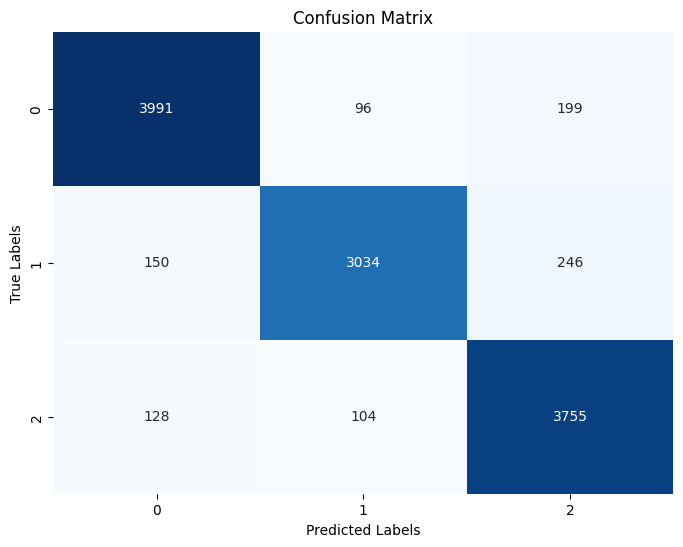

Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.93      0.93      4286
     Neutral       0.94      0.88      0.91      3430
    Positive       0.89      0.94      0.92      3987

    accuracy                           0.92     11703
   macro avg       0.92      0.92      0.92     11703
weighted avg       0.92      0.92      0.92     11703



In [31]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a classification report
class_report = classification_report(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("Classification Report:")
print(class_report)

In [32]:
# Print some actual vs predicted labels along with tweet text
print("Actual vs Predicted Labels with Tweet Text:")
for tweet, actual_label, predicted_label in zip(X_test[:10], y_test[:10], y_pred[:10]):
    print("Tweet:", tweet)
    print("Actual Label:", actual_label)
    print("Predicted Label:", predicted_label)
    print("-----------------------")

Actual vs Predicted Labels with Tweet Text:
Tweet: unexplained illness adverse effects radiation poisoning
Actual Label: Negative
Predicted Label: Negative
-----------------------
Tweet: broke
Actual Label: Negative
Predicted Label: Negative
-----------------------
Tweet: still favorite cod teaser ever
Actual Label: Positive
Predicted Label: Positive
-----------------------
Tweet: arteezy fast game mercy vs super hero queen pain linkbemdvhkdtwyg youtube
Actual Label: Neutral
Predicted Label: Neutral
-----------------------
Tweet: tuff shed sold bear valley home depot great job hortalora dsm briantuffshed tuffshedjr pictwittercom pczkauvpnf
Actual Label: Positive
Predicted Label: Positive
-----------------------
Tweet: looks silly dont tell everyone gets latest
Actual Label: Neutral
Predicted Label: Neutral
-----------------------
Tweet: day later revising seems kinda crap im scorebreaks like
Actual Label: Negative
Predicted Label: Negative
-----------------------
Tweet: damn time thats

In [33]:
import pickle

with open('../model.pickle', 'wb') as file:
    pickle.dump(rf_classifier, file)

In [34]:
# Load the saved model
Tweet_Sentiment_Ai = joblib.load('rf_model.pkl')

# Define a mapping between sentiment labels and emojis
sentiment_emojis = {
    'Positive': '😄',
    'Negative': '😞',
    'Neutral': '😐',
    'Irrelevant': '🤷‍♂️'
}

# Example tweets
example_tweets = [
    "I just finished playing Borderlands and it was absolutely amazing! Can't wait for the next one!",
    "I'm really disappointed with the latest Borderlands update. It ruined the game for me.",
    "Haven't played Borderlands in a while. Need to catch up on the latest updates.",
    "Just saw a funny cat video while searching for Borderlands gameplay. Cats always cheer me up!"
]


# Transform example tweets into TF-IDF features
example_tweets_tfidf = vectorizer.transform(example_tweets)

# Predict sentiment for example tweets
predictions = Tweet_Sentiment_Ai.predict(example_tweets_tfidf)

# Print the predicted sentiment and corresponding emoji for each example tweet
for tweet, prediction in zip(example_tweets, predictions):
    sentiment = prediction
    emoji = sentiment_emojis[sentiment]  # Get the emoji directly from the mapping without a default value
    print("Tweet:", tweet)
    print("Sentiment:", sentiment)
    print("Emoji:", emoji)
    print()

Tweet: I just finished playing Borderlands and it was absolutely amazing! Can't wait for the next one!
Sentiment: Positive
Emoji: 😄

Tweet: I'm really disappointed with the latest Borderlands update. It ruined the game for me.
Sentiment: Negative
Emoji: 😞

Tweet: Haven't played Borderlands in a while. Need to catch up on the latest updates.
Sentiment: Neutral
Emoji: 😐

Tweet: Just saw a funny cat video while searching for Borderlands gameplay. Cats always cheer me up!
Sentiment: Neutral
Emoji: 😐

